# Traitements statistiques
__Durée : 1h30__

Pandas et Matplotlib

In [12]:
#Charger les librairies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
corpus = pd.read_excel("corpus.xlsx")

La météo de Marseille en mars

meteo = pd.read_csv("Données/export-marseille201903.csv",sep=",")
meteo = meteo.set_index("DATE")

In [35]:

import regex as re
import datetime

def reco_date(x):
    mois = {"janvier":"01","février":"02","mars":"03",
            "avril":"04","mai":"05","juin":"06","juillet":"07",
            "août":"08","septembre":"09","octobre":"10","novembre":"11","décembre":"12"}
    t = re.findall("\w+ \w+ [0-9]{4}",x)
    if len(t) <1:
        return None
    t = t[0]
    for i in mois:
        if i in t:
            t = t.replace(i,"/%s/"%mois[i]).replace(" ","")
    return datetime.datetime.strptime(t,"%d/%m/%Y")

In [36]:
corpus["Date"] = corpus["Date"].apply(reco_date)

In [41]:
corpus[0:3]

,Date,Titre,Journal,Contenu,Nombre de mots,Nombre de mots v2,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed
0,2018-05-23,Homéopathie Une réglementation à haute diluti...,Le Monde,(Lyon; correspondant); - Quand on lui parle ...,2546,2679,43,2,2,0
1,2018-11-28,"Nofakemed, symptôme d'un malaise médical Nofa...",Le Monde,Les médecines complémentaires et en particul...,2446,2545,17,3,0,6
2,2018-09-07,Homéopathie : les doyens des facultés de méde...,Le Monde,Le président de la conférence des doyens des...,710,748,15,2,0,0


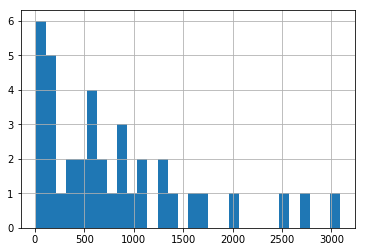

In [50]:
corpus["Nombre de mots v2"].hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0b5db7e80>,
      dtype=object)

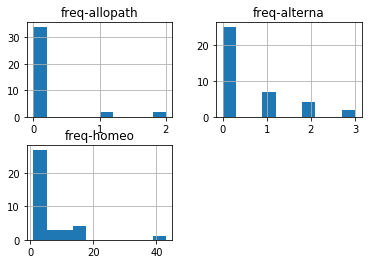

In [57]:
corpus[["freq-homeo","freq-allopath","freq-alterna"]].hist()

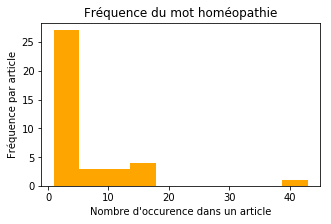

In [73]:
corpus["freq-homeo"].hist(bins=10,color="orange",figsize=(5,3))
plt.title("Fréquence du mot homéopathie")
plt.xlabel("Nombre d'occurence dans un article")
plt.ylabel("Fréquence par article")
plt.grid(False)
plt.savefig("histo-homéo.pdf")


(736695.0, 737150.0)

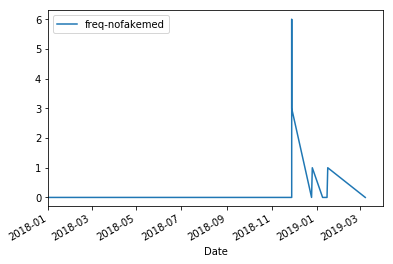

In [79]:
corpus[["Date","freq-nofakemed"]].set_index("Date").plot()
plt.xlim(["01/01/2018","04/01/2019"])

Text(0, 0.5, "Nombre d'occurence de homéopathie")

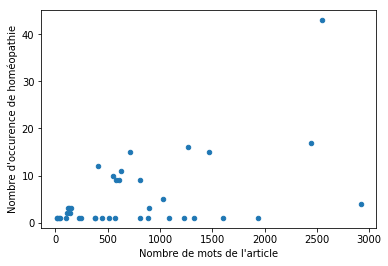

In [88]:
corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
plt.xlabel("Nombre de mots de l'article")
plt.ylabel("Nombre d'occurence de homéopathie")

## Visualiser
* Différentes visualisations
* Mettre un titre, légende ,couleur, taille
* Sauvegarder
* Plusieurs graphiques fig, ax_lst = plt.subplots(2, 2)

In [103]:
corpus[corpus.columns[-5:]].agg(["mean","median","std"]).T.to_excel("stats.xlsx")
corpus[corpus.columns[-5:]].agg(["mean","median","std"])

,Nombre de mots v2,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed
mean,805.921053,5.526316,0.552632,0.157895,0.289474
median,597.500000,1.500000,0.000000,0.000000,0.000000
std,778.113741,8.046274,0.891321,0.494637,1.088214


In [100]:
corpus["Nombre de mots v2"].mean()

805.921052631579

In [105]:
corpus[corpus.columns[-5:]].corr()

,Nombre de mots v2,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed
Nombre de mots v2,1.000000,0.503581,0.406357,0.292224,0.436703
freq-homeo,0.503581,1.000000,0.538698,0.548977,0.170416
freq-alterna,0.406357,0.538698,1.000000,0.164549,0.360038
freq-allopath,0.292224,0.548977,0.164549,1.000000,-0.087208
freq-nofakemed,0.436703,0.170416,0.360038,-0.087208,1.000000


In [117]:
ss_corpus = corpus[corpus.columns[-4:]] != 0

In [118]:
ss_corpus[0:5]

,freq-homeo,freq-alterna,freq-allopath,freq-nofakemed
0,True,True,True,False
1,True,True,False,True
2,True,True,False,False
3,True,False,False,False
4,True,True,False,False


In [112]:
pd.crosstab(ss_corpus["freq-allopath"],ss_corpus["freq-nofakemed"])

freq-nofakemed,False,True
freq-allopath,,
False,30,4
True,4,0


In [119]:
from scipy.stats import chi2_contingency

In [125]:
p = chi2_contingency(pd.crosstab(ss_corpus["freq-allopath"],ss_corpus["freq-nofakemed"]))
p[1]

## Calculer des statistiques

* Indicateurs de position et de variance
* Corrélations
* Tableau croisé
* Réaliser un test de kih2

Text(0, 0.5, "Nombre d'occurence de homéopathie")

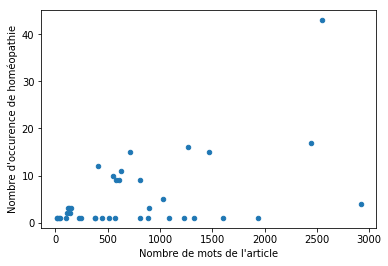

In [140]:
ax = corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
plt.xlabel("Nombre de mots de l'article")
plt.ylabel("Nombre d'occurence de homéopathie")

In [129]:
import numpy as np

In [146]:
param_droite = np.polyfit(corpus["Nombre de mots v2"],corpus["freq-homeo"],deg=2)

In [147]:
param_droite

array([5.43470993e-07, 3.77940283e-03, 1.80703506e+00])

In [142]:
def droite(x,a,b):
    y = a*x+b
    return y

In [148]:
def parabole(x,a,b,c):
    y = a*x**2+b*x+c
    return y

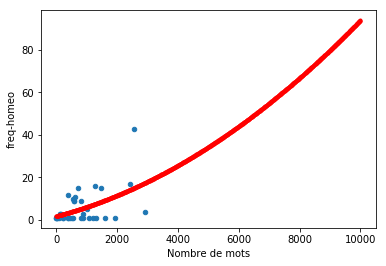

In [157]:
ax = corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
X = np.linspace(0,10000,1000)
ax.plot(X,parabole(X,param_droite[0],param_droite[1],param_droite[2]),".",color="red")

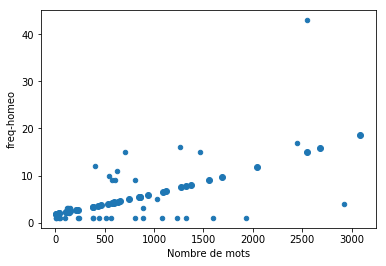

In [151]:
ax = corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
ax.plot(corpus["Nombre de mots v2"],parabole(corpus["Nombre de mots v2"],param_droite[0],param_droite[1],param_droite[2]),"o")

In [160]:
from sklearn.linear_model import LinearRegression

In [163]:
modele = LinearRegression()

In [177]:
X = np.array(corpus["Nombre de mots v2"]).reshape((-1, 1))
Y = np.array(corpus["freq-homeo"]).reshape((-1, 1))

modele.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
modele.coef_

array([[0.0052074]])

In [178]:
Y_pred = modele.predict(X)

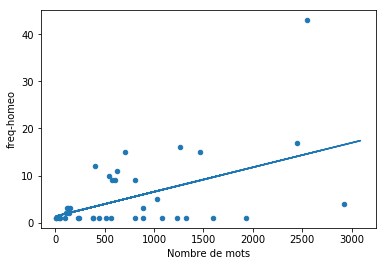

In [179]:
ax = corpus.plot(kind="scatter", x="Nombre de mots",y="freq-homeo")
ax.plot(X,Y_pred)

## Aller vers des modèles
* Régression linéaire (polyfit, poly1d)
* Régression logistique
* Classifier des données